# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Importing-shared-tools" data-toc-modified-id="Importing-shared-tools-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Importing shared tools</a></div><div class="lev1 toc-item"><a href="#Visualization" data-toc-modified-id="Visualization-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Visualization</a></div><div class="lev2 toc-item"><a href="#General-(basic)-plots" data-toc-modified-id="General-(basic)-plots-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>General (basic) plots</a></div><div class="lev2 toc-item"><a href="#Plots-per-query" data-toc-modified-id="Plots-per-query-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Plots per query</a></div><div class="lev2 toc-item"><a href="#Model-plots" data-toc-modified-id="Model-plots-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Model plots</a></div><div class="lev2 toc-item"><a href="#Animation-plots" data-toc-modified-id="Animation-plots-24"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Animation plots</a></div><div class="lev3 toc-item"><a href="#Perf.-metric-distribution-animation" data-toc-modified-id="Perf.-metric-distribution-animation-241"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>Perf. metric distribution animation</a></div><div class="lev3 toc-item"><a href="#Performance-plots" data-toc-modified-id="Performance-plots-242"><span class="toc-item-num">2.4.2&nbsp;&nbsp;</span>Performance plots</a></div><div class="lev1 toc-item"><a href="#Factory-Floor" data-toc-modified-id="Factory-Floor-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Factory Floor</a></div><div class="lev2 toc-item"><a href="#Analyse-results" data-toc-modified-id="Analyse-results-31"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Analyse results</a></div><div class="lev2 toc-item"><a href="#Global-plots" data-toc-modified-id="Global-plots-32"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Global plots</a></div><div class="lev2 toc-item"><a href="#Performance-plots" data-toc-modified-id="Performance-plots-33"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Performance plots</a></div>

# Importing shared tools

In [1]:
# Start by import the exp package.

import sys
import os
import numpy as np
import seaborn as sns

src_folder = os.path.dirname(os.getcwd())       # Current file is in a subfolder 'ipynb' or 'core' of the src directory
main_folder = os.path.dirname(src_folder)       # Main folder of the experiment (= where everything runs)

py_pkg_folder = os.path.join(main_folder,'libs')
if py_pkg_folder not in sys.path: sys.path.append(py_pkg_folder)
    
from exp.tools.shared import *
from exp.analysis import *

from matplotlib import animation
from matplotlib import pyplot as plt
from IPython.display import HTML

# Visualization

Here we collect everything related to visualizations.

## General (basic) plots

In [2]:
# Some exploratory and straighforward plots.

def plot_datasets(df,save=''):
    """
    Dataset distribution
    """
    
    g = sns.lmplot(x="Nb Tuples", y="Nb Atts", hue="Dataset", size=8 ,data=df,fit_reg=False,scatter_kws={"s": 150})
    
    fname='figs/'+save+'_'+'datasets'+'.png'
    g.savefig(fname) if save != '' else None 
    return g

def plot_avg_F1(df,group='System',save=''):
    """
    Show the avg F1 per DataSet.
    """
    
    g = sns.factorplot(x="Dataset", y="F1/Query", hue=group, data=df, size=8, kind="bar", palette="muted")
    g.despine(left=True)
    
    g.set_ylabels("Average (F1-score/Target)/Query")
    
    fname='figs/'+save+'_'+'avg_F1_compare_'+group+'.png'
    g.savefig(fname) if save != '' else None
    return g

def plot_avg_acc(df,group='System',save=''):
    """
    Show the avg Acc/Query per DataSet.
    """
    
    g = sns.factorplot(x="Dataset", y="Acc/Query", hue=group, data=df, size=8, kind="bar", palette="muted")
    g.despine(left=True)
    
    g.set_ylabels("Average (Acc./Target)/Query")
    
    fname='figs/'+save+'_'+'avg_F1_compare_'+group+'.png'
    g.savefig(fname) if save != '' else None
    return g

def plot_avg_F1_pred(df,group='System',save=''):
    """
    Show the avg F1 per prediction technique.
    """
    
    g = sns.factorplot(x="prediction", y="F1/Query", hue=group, data=df,
                   size=6, kind="bar", palette="muted")
    g.despine(left=True)
    
    g.set_ylabels("Average (F1-score/Target)/Query")
    
    fname='figs/'+save+'_'+'avg_F1_pred_'+group+'.png'
    g.savefig(fname) if save != '' else None
    return g

def plot_avg_F1_query_param(df,group='System',save=''):
    """
    Show the avg F1 per query-parameter.
    
    E.g.: In the case of 'missing' queries this implies the ratio of missing attributes.
    """
    
    g = sns.factorplot(x="query_param", y="F1/Query", hue=group, data=df,
                   size=6, kind="bar", palette="muted")
    g.despine(left=True)
    
    g.set_ylabels("Average (F1-score/Target)/Query")
    
    fname='avg_F1_pred_'+group+'.png'
    g.savefig(fname) if save != '' else None
    return g

def plot_avg_ind(df,group='System',save='',log=False):
    """
    Show the avg induction time per Dataset
    """
    
    g = sns.factorplot(x="Dataset", y="Ind t", hue=group, data=df,
                   size=8, kind="bar", palette="muted")
    g.despine(left=True)
    
    g.fig.get_axes()[0].set_yscale('log') if log == True else None
    g.set_ylabels("Average model induction time")
    
    logmessage = 'log' if log == True else ''
    fname='figs/'+save+'_'+'avg_ind_compare_'+group+'_'+logmessage+'.png'
    g.savefig(fname) if save != '' else None 
    return g

def plot_avg_inf(df,group='System',save='',log=False):
    """
    Show the total inference time per Dataset
    """
    
    g = sns.factorplot(x="Dataset", y="Inf t", hue=group, data=df,
                   size=8, kind="bar", palette="muted")
    g.despine(left=True)
    
    g.set_ylabels("Average model inference time")
    g.fig.get_axes()[0].set_yscale('log') if log == True else None
    
    logmessage = 'log' if log == True else ''
    fname='figs/'+save+'_'+'avg_inf_compare_'+group+'_'+logmessage+'.png'
    g.savefig(fname) if save != '' else None 
    return g

def plot_avg_inf_query(df,group='System',save='',log=False):
    """
    Show the avg inf_t/query, per Dataset
    """
    
    g = sns.factorplot(x="Dataset", y="Mean time/Query", hue=group, data=df,
                   size=8, kind="bar", palette="muted")
    g.despine(left=True)
    
    
    g.set_ylabels("Average inference time/query")
    g.fig.get_axes()[0].set_yscale('log') if log == True else None
    
    logmessage = 'log' if log == True else ''
    fname='figs/'+save+'_'+'avg_inf_query_compare_'+group+'_'+logmessage+'.png'
    g.savefig(fname) if save != '' else None 
    return g

def plot_avg_F1_ensembles(df,save=''):
    """
    Show the avg F1 per ensemble technique.
    """
    
    g = sns.factorplot(x="ens_its", y="F1/Query", hue='Dataset', data=df,
                   size=6, kind="bar", palette="muted")
    g.despine(left=True)
    g.set_ylabels("Average F1/Query vs Ens Iteration")
    fname='figs/'+save+'_'+'avg_f1_query_ensemble_its'+'.png'
    g.savefig(fname) if save != '' else None 
    return g

## Plots per query

In [3]:
# Plots that use data per query, i.e. focus on one experiment.

def per_targetset_plot(df,ys = ['F1'],yrange=[0,1]):
    plt.style.use('fivethirtyeight')

    
    x = df['ts_ID'].values
    
    fig, ax = plt.subplots()
    plt.xlim([0, len(x)]) 
    plt.ylim(yrange)
    
    for y in ys:
        y_quant = df[y].values
        ax.plot(x, y_quant,label=y)
    
    title="Quantity across targetsets"
    
    ax.set_title(title) 
    ax.legend(loc='lower right')
    plt.show()
    return 

def per_targetset_distr(df,ys = ['F1'],xrange=[0,1]):
    """
    Distrubution plotted with matplotlib, across all queries of a given experiment.
    """
    
    plt.style.use('fivethirtyeight')
    
    x = df['ts_ID'].values
    fig, ax = plt.subplots()
    #plt.xlim(xrange) 
    #plt.ylim([0,5])
    
    for y in ys:
        y_quant = df[y].values
        n, bins, patches = ax.hist(y_quant, 100,normed=0.5, alpha=0.75)
    
    title="Distribution across targetsets"
    
    ax.set_title(title) 
    plt.grid(True)
    plt.show()
    return 

def per_ts_distr(df, y ='F1', xrange=[0,1]):
    """
    Distribution plotted with seaborn.
    """
    
    sns.set(style="white", palette="muted", color_codes=True)
    sns.despine(left=True)
    
    f, axes = plt.subplots(1, 2, figsize=(14, 7), sharex=True)
    
    
    d = df[y]
    
    # Plot a simple histogram with binsize determined automatically
    sns.distplot(d, kde=False, color="b", ax=axes[0])
    
    # Plot a filled kernel density estimate
    sns.distplot(d, hist=False, color="g", kde_kws={"shade": True}, ax=axes[1])
    
    plt.setp(axes, yticks=[])
    plt.tight_layout()
    return 

def make_hist_kde_plot(data,param,x_range=[0.0,1.0]):
    """
    Make a back-to-back histogram/kde plot
    
    :param data:    The data to plot, typically a performance measure, i.e. F1 or accuracy
    :param param:   The parameter that serves as time dimension of the animation, typically something like nb missing atts.
    :param x_range: No comment.
    """
    
    plt.clf()
    fig, axes = plt.subplots(1, 2, figsize=(14, 7), sharex=True)
    sns.set(style="white", palette="muted", color_codes=True)
    sns.despine(left=True)
    
    axes[0].set_xlim(x_range)
    axes[1].set_xlim(x_range)
    
    sns.distplot(data, kde=False, color="b", ax=axes[0])
    sns.distplot(data, hist=False, color="g", kde_kws={"shade": True}, ax=axes[1])
    
    ratio=format(param, '.2f')

    fig.suptitle("Missing attributes ratio: "+ratio, fontsize=28)
    plt.setp(axes, yticks=[])
    plt.tight_layout()

    return fig, axes, x_range

## Model plots

In [4]:
def plot_model(ID, save='', data_loc=None):
    """
    Plot the schematic ensemble histograms
    """
    
    mf=read_manifest(ID)
    method=mf['induction']['ensemble'] if mf['induction']['basetype']=='Ensemble' else 'TDIDT'
    dataset=mf['dataset']
    
    desc, targ=get_mercs_model(ID, data_loc)
    
    desc_lens=[len(item) for item in desc]
    flat_desc, flat_targ = flatten_model(desc, targ)

    plt.clf()
    fig, axes = plt.subplots(1, 3, figsize=(14, 7), sharex=True)
    sns.set(style="white", palette="muted", color_codes=True)

    sns.distplot(flat_desc, kde=False, color="b", kde_kws={"shade": True}, ax=axes[0])
    sns.distplot(flat_targ, kde=False, color="r", kde_kws={"shade": True}, ax=axes[1])
    sns.distplot(desc_lens, kde=False, color="g", kde_kws={"shade": True}, ax=axes[2])
    
    axes[0].set_title("Descriptive attributes",size=16)
    axes[1].set_title("Target attributes",size=16)
    axes[2].set_title("Amount of desc. atts.",size=16)

    axes[0].grid(True)
    axes[1].grid(True)
    axes[2].grid(True)

    sns.despine(left=True)
    
    fig.suptitle('[ID: '+str(ID)+'] '+dataset+'-'+method , fontsize=28)
    
    fname='figs/'+save+'_model_summary_'+dataset+'_'+method+'.png'
    fig.savefig(fname) if save != '' else None 
    #plt.tight_layout()
    plt.show()
    return 

## Animation plots

### Perf. metric distribution animation

In [5]:
# Helper functions for the distplots animations

def next_frame_distplot(i):
    axes[0].cla()
    axes[1].cla()
    axes[0].set_xlim(x_range)
    axes[1].set_xlim(x_range)
    sns.distplot(data[i], kde=False, color="b", ax=axes[0])
    sns.distplot(data[i], hist=False, color="g", kde_kws={"shade": True}, ax=axes[1])

    ratio=format(param[i], '.2f')

    fig.suptitle("Missing attributes ratio: "+ratio, fontsize=28)
    plt.setp(axes, yticks=[])
    plt.tight_layout()
    return

def collect_data_for_distplot_animation(id_range):
    """
    Extract per query performance measures for a number of experiments.
    
    In this way we can see the impact of the variation of a certain parameter (e.g. ratio of missing atts)
    on the performance across queries.
    """
    # Performance measures
    acc=[]
    f1=[]
    param=[] # The (query-)parameter (e.g. missing atts ratio) that serves as the 'time' direction in the animation.
    
    
    for i in range(id_range[0],id_range[1]+1):
        df = get_exp_df_single(i)
        acc.append(df.Acc.values)
        f1.append(df.F1.values)
        param.append(df.param.values[0]) # Currently, I assume the parameter to be fixed across all the exps
        
    assert len(acc) == len(f1) == len(param)
        
    return acc, f1, param

def collect_data_for_distplot_anim_2(ID):
    """
    In case of the it_missing_2 setting, where a lot of queries happen inside a single experiment.
    """
    # Performance measures
    acc=[]
    f1=[]
    param=[]
    
    # Collecting data (performance metrics and query-info)
    df = get_exp_df_single(ID)
        
    #df1=df[['Dataset','prediction','Acc','F1','missing']]
    
    return df

## New query plot

Trying to make a new visualization. Collecting all the useful stuff here.

In [6]:
def collect_query_properties(ID):
    
    df=get_exp_df_single(ID)
    mf=read_manifest(ID)
    
    df['target']=np.array(mf['inference']['targetsets'])[:,0]
    
    nb_missing=[len(e) for e in mf['inference']['missingsets']]
    df['nb_miss']=nb_missing
    
    return df[['target','nb_miss','Acc','F1','micro_F1']]

def transform_query_properties(df, x='target', y='nb_miss', value='Acc'):
    """
    Transforming the queries to a 2D Matrix.
    
    The big problem is that most of the times, the x,y combination provides a unique value, but not always.
    So first we have to some tricks to deal with the case where x,y (e.g. (nb_miss, target_att)) 
    refers to different values.
    """
    
    df=df[[x,y,value]].reset_index()
    
    grouped=df.groupby([x, y]) # Groupby allows us to identify the problem cases swiftly
    df=grouped.mean().reset_index()
    
    df=df.pivot(index=x,columns=y,values=value)
    return df

def plot_heatmap(df):
    f, ax = plt.subplots(figsize=(9, 6))
    sns.heatmap(df, annot=True, linewidths=.5, ax=ax)
    return

### Performance plots

In [7]:
# Plots to show systematic behaviour of the performance measures.

def collect_avgs(df):
    param=np.unique(df['missing'].values)
    accs=[]
    macro_F1s, micro_F1s = [], []
    
    for i in range(len(param)):
        df_filt=df[df['missing']==param[i]] 
        accs.append(df_filt.Acc.values)
        macro_F1s.append(df_filt.F1.values)
        micro_F1s.append(df_filt.micro_F1.values)
        
    avg_acc=[np.mean(x) for x in accs]
    avg_macro_F1=[np.mean(x) for x in macro_F1s]
    avg_micro_F1=[np.mean(x) for x in micro_F1s]
    
    d={}
    d['avg_acc']=avg_acc
    d['avg_macro_F1']=avg_macro_F1
    d['avg_micro_F1']=avg_micro_F1
    d['missing']=param
    
    df2=pd.DataFrame(d)
    return df2

def plot_B2B(ID1, ID2, ys=['avg_acc','avg_macro_F1','avg_micro_F1'], y_range=[0,1],save=''):
    """
    Plot performance measures over a good selection of queries. Compare two prediction algorithms.
    
    :param df_1:    First DataFrame as input.
                        Comes from the custom collect_data_for_distplot_anim_2(ID) method.
    :param df_2:    Second DataFrame as input. Same remark
    :param ys:      The performance criterium/a that will be plotted. I.e. accuracy and macro-F1.
    :param y_range: Range of y-axis.
    :param save:    If you fill in any kind of string here, the figure will be saved, with the string as first part of the filename.
    """
    
    df_1 = collect_data_for_distplot_anim_2(ID1)
    df_2 = collect_data_for_distplot_anim_2(ID2)

    assert len(np.unique(df_1.Dataset.values))==len(np.unique(df_2.Dataset.values))==1 
    assert df_1.Dataset.values[0] == df_2.Dataset.values[0] 
    assert len(np.unique(df_1.prediction.values))==len(np.unique(df_2.prediction.values))==1 
    
    dataset=df_1.Dataset.values[0]
    pred_algo_1, pred_algo_2=df_1.prediction.values[0], df_2.prediction.values[0]
    
    df_1, df_2 = collect_avgs(df_1), collect_avgs(df_2)
    
    # Begin the plot here
    plt.style.use('fivethirtyeight')
    fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharex=True)

    x = df_1['missing'].values
    x_range=[0, np.max(x)]
    for y in ys:
        y_quant_0 = df_1[y].values
        y_quant_1 = df_2[y].values
        axes[0].plot(x, y_quant_0,label=y)
        axes[1].plot(x, y_quant_1,label=y)
    
    axes[0].set_title(pred_algo_1+' pred.',fontsize=20) 
    axes[1].set_title(pred_algo_2+' pred.',fontsize=20)
    #axes[1].legend(loc='lower right',fontsize=18,frameon=True,fancybox=True,facecolor='w')
    
    for ax in axes:
        ax.minorticks_on()
        ax.set_xlim(x_range)
        ax.set_xlabel('Nb missing atts.')
        ax.set_ylim(y_range)
        ax.grid(b=True, which='major', color='black', linestyle='-',alpha=1)
        ax.grid(b=True, which='minor', color='gray', linestyle='--',alpha=0.5)
        
    
    global_title='Dataset: '+dataset
    fig.suptitle(global_title,fontsize=26)
    
    fname='figs/'+save+'_'+pred_algo_1+'_vs_'+pred_algo_2+'_'+dataset+'.png'
    fig.savefig(fname) if save != '' else None 
    
    plt.show()
    return

def plot_predstrats_B2B(ID1, ID2, ID3, ys=['avg_acc','avg_macro_F1','avg_micro_F1'],y_range=[0,1],save=''):
    
    # Collecting dataframes
    df1, df2, df3 = collect_data_for_distplot_anim_2(ID1), collect_data_for_distplot_anim_2(ID2), collect_data_for_distplot_anim_2(ID3)
    
    dataset=df1.Dataset.values[0]
    pred_algo_1, pred_algo_2, pred_algo_3=df1.prediction.values[0], df2.prediction.values[0], df3.prediction.values[0]
    
    df1, df2, df3 = collect_avgs(df1), collect_avgs(df2), collect_avgs(df3) 
    
    # Begin the plot here
    plt.style.use('fivethirtyeight')
    fig, axes = plt.subplots(1, 3, figsize=(20, 10), sharex=True)

    x = df1['missing'].values
    x_range=[0, np.max(x)]
    
    for y in ys:
        y_quant_0 = df1[y].values
        y_quant_1 = df2[y].values
        y_quant_2 = df3[y].values
        axes[0].plot(x, y_quant_0,label=y)
        axes[1].plot(x, y_quant_1,label=y)
        axes[2].plot(x, y_quant_2,label=y)
    
    axes[0].set_title(pred_algo_1+' pred.',fontsize=20) 
    axes[1].set_title(pred_algo_2+' pred.',fontsize=20)
    axes[2].set_title(pred_algo_3+' pred.',fontsize=20)
    axes[2].legend(loc='lower right',fontsize=18,frameon=True,fancybox=True)
    
    for ax in axes:
        ax.minorticks_on()
        ax.set_xlim(x_range)
        ax.set_xlabel('Nb missing atts.')
        ax.set_ylim(y_range)
        ax.grid(b=True, which='major', color='black', linestyle='-',alpha=1)
        ax.grid(b=True, which='minor', color='gray', linestyle='--',alpha=0.5)
        
    global_title='Dataset: '+dataset
    fig.suptitle(global_title,fontsize=26)
    
    fname='figs/'+save+'_'+pred_algo_1+'_vs_'+pred_algo_2+'_vs_'+pred_algo_3+'_'+dataset+'.png'
    fig.savefig(fname) if save != '' else None 
    
    plt.show()
    return

def plt_predstats_together(ID1, ID2, ID3,ys=['avg_acc'],y_range=[0,1],save=''):
    
    # Collecting DataFrames
    df1, df2, df3 = collect_data_for_distplot_anim_2(ID1), collect_data_for_distplot_anim_2(ID2),collect_data_for_distplot_anim_2(ID3)
    
    dataset=df1.Dataset.values[0]
    pred_algo_1, pred_algo_2, pred_algo_3 = df1.prediction.values[0], df2.prediction.values[0], df3.prediction.values[0]
    
    df1, df2, df3 = collect_avgs(df1), collect_avgs(df2), collect_avgs(df3)
    # Begin the plot here
    plt.style.use('fivethirtyeight')

    x = df1['missing'].values
    x_range=[0, np.max(x)]
    y=ys[0]
    
    y_quant_0 = df1[y].values
    y_quant_1 = df2[y].values
    y_quant_2 = df3[y].values
    plt.plot(x, y_quant_0,label=pred_algo_1)
    plt.plot(x, y_quant_1,label=pred_algo_2)
    plt.plot(x, y_quant_2,label=pred_algo_3)

    
    #plt.set_title(pred_algo_1+' pred.',fontsize=20) 
    plt.legend(loc='lower left',fontsize=18,frameon=True,fancybox=True)
    
    #plt.minorticks_on()
    #plt.set_xlim(x_range)
    #plt.set_xlabel('Nb missing atts.')
    #plt.set_ylim(y_range)
    #plt.grid(b=True, which='major', color='black', linestyle='-',alpha=1)
    #plt.grid(b=True, which='minor', color='gray', linestyle='--',alpha=0.5)
        
    global_title='Dataset: '+dataset
    plt.suptitle(global_title,fontsize=26)
    
    fname='figs/'+save+'_'+pred_algo_1+'_vs_'+pred_algo_2+'_vs_'+pred_algo_3+'_'+dataset+'.png'
    plt.savefig(fname) if save != '' else None 
    
    plt.show()
    return
                           
def plot_predstrats_all(ID1, ID2, ID3, ID4, targetset='',ys=['avg_acc','avg_macro_F1','avg_micro_F1'],y_range=[0,1],save=''):
    
    # Collecting dataframes
    df1, df2, df3, df4 = collect_data_for_distplot_anim_2(ID1), collect_data_for_distplot_anim_2(ID2), collect_data_for_distplot_anim_2(ID3), collect_data_for_distplot_anim_2(ID4)
    
    if targetset != '':
        check=[True  if i == targetset else False for i in df1['target']]
        series=pd.Series(check)
        df1,df2,df3,df4=df1[series],df2[series],df3[series],df4[series]
    else:
        pass
    
    dataset=df1.Dataset.values[0]
    
    dfs=[df1,df2,df3,df4]
    systems=[df.system.values[0] for df in dfs]
    pred_algos=[df.prediction.values[0] for df in dfs]
    headers=[df.system.values[0]+', '+ df.prediction.values[0] for df in dfs]
    
    df1, df2, df3, df4 = collect_avgs(df1), collect_avgs(df2), collect_avgs(df3), collect_avgs(df4) 
    
    # Begin the plot here
    plt.style.use('fivethirtyeight')
    fig, axes = plt.subplots(1, 4, figsize=(24, 7), sharex=True)

    x = df1['missing'].values
    x_range=[0, np.max(x)]
    
    for y in ys:
        y_quant_0 = df1[y].values
        y_quant_1 = df2[y].values
        y_quant_2 = df3[y].values
        y_quant_3 = df4[y].values
        axes[0].plot(x, y_quant_0,label=y)
        axes[1].plot(x, y_quant_1,label=y)
        axes[2].plot(x, y_quant_2,label=y)
        axes[3].plot(x, y_quant_3,label=y)
    
    axes[0].set_title(headers[0],fontsize=20) 
    axes[1].set_title(headers[1],fontsize=20)
    axes[2].set_title(headers[2],fontsize=20)
    axes[3].set_title(headers[3],fontsize=20)
    axes[3].legend(loc='lower right',fontsize=18,frameon=True,fancybox=True)
    
    for ax in axes:
        ax.minorticks_on()
        ax.set_xlim(x_range)
        ax.set_xlabel('Nb missing atts.')
        ax.set_ylim(y_range)
        ax.grid(b=True, which='major', color='black', linestyle='-',alpha=1)
        ax.grid(b=True, which='minor', color='gray', linestyle='--',alpha=0.5)
        
    global_title='Dataset: '+dataset
    fig.suptitle(global_title,fontsize=26)
    
    fname='figs/'+save+'_'+dataset+'.png'
    fig.savefig(fname) if save != '' else None 
    
    plt.show()
    return

def plot_pred_per_targetset(ID1, ID2, ID3, ID4,ys=['avg_acc','avg_macro_F1','avg_micro_F1'],y_range=[0,1],save=''):
    
    df_whatever = collect_data_for_distplot_anim_2(ID1)
    unique_targetsets=np.unique(df_whatever['target'].values)
    
    for targetset in unique_targetsets:
        plot_predstrats_all(ID1, ID2, ID3, ID4,targetset, ys=['avg_acc','avg_F1'],y_range=[0,1],save='')
    
    return    

# Factory Floor

## Analyse results

If working externally, use the dedicated python script for this if you have many.

In [8]:
# Perform analysis
IDs=[1,2]
analyze_and_save_all(IDs)

# Collect in DF
df=get_exp_df_all(IDs)
df=calc_mean_time_query(df)
df

IndexError: list index out of range

## Global plots

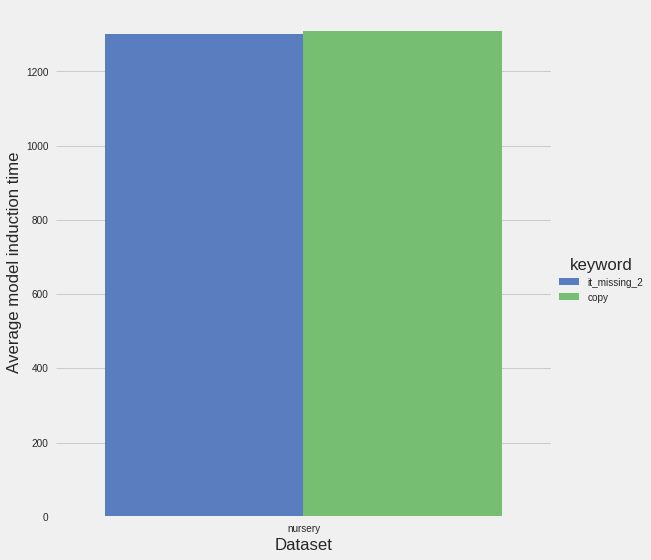

In [26]:
plot_avg_ind(df,group='keyword',save='',log=False)
plt.show()

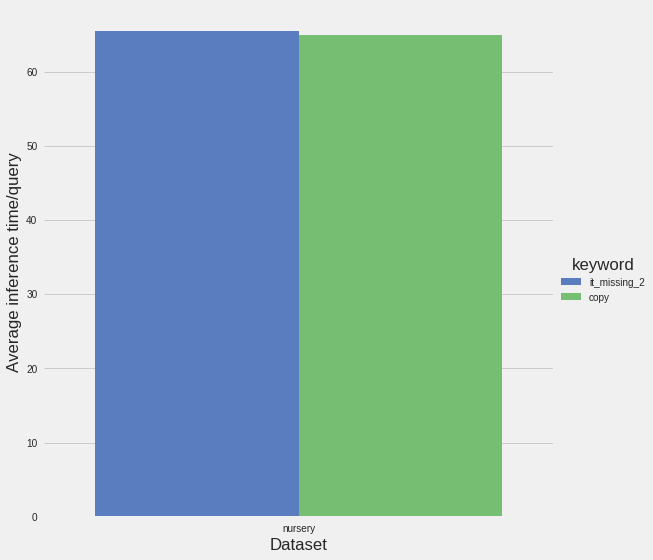

In [27]:
plt.clf()
plot_avg_inf_query(df,group='keyword',save='',log=False)
plt.show()

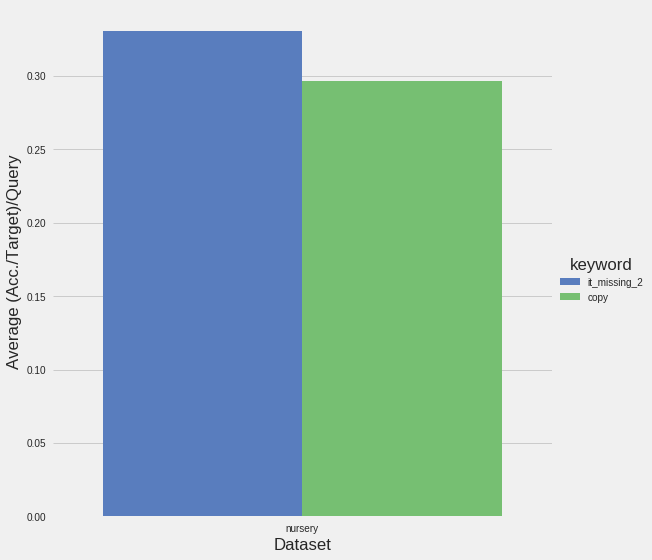

In [28]:
plt.clf()
plot_avg_acc(df,group='keyword',save='')
plt.show()

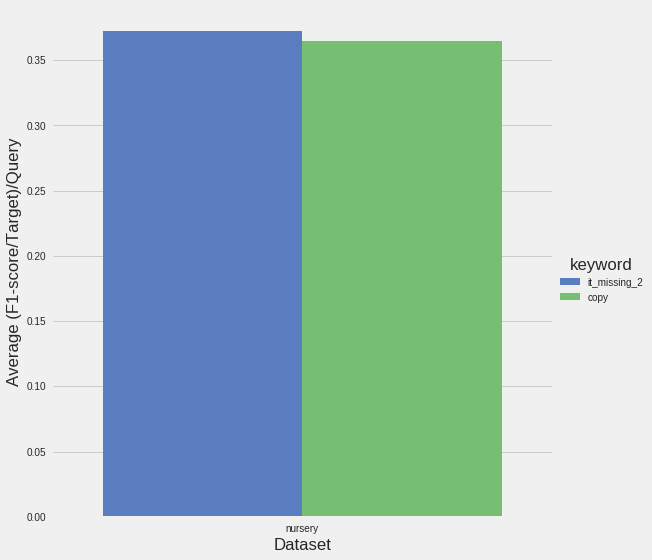

In [29]:
plot_avg_F1(df,group='keyword',save='')
plt.show()

## Performance plots

Here you can compare with experiments with other IDs. To see if a new function hurt the functionality or not.

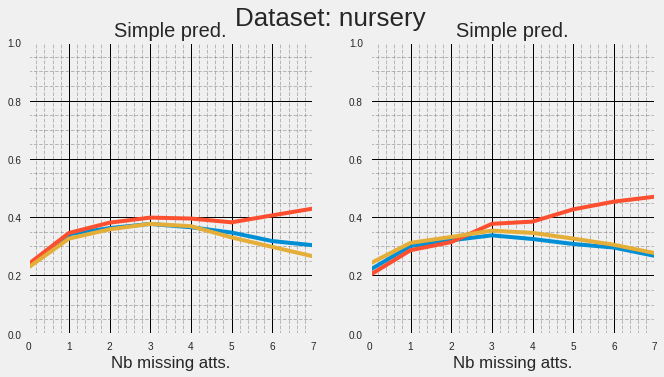

In [31]:
plot_B2B(1,2)